# Triangle Creation Basics

In [1]:
import chainladder as cl
import pandas as pd


This example demonstrates the typical way you'd ingest data into a Triangle.
Data in tabular form in a pandas DataFrame is required.  At a minimum, columns
specifying origin and development, and a value must be present.  Note, you can
include more than one column as a list as well as any number of indices for
creating triangle subgroups.

In this example, we create a triangle object with triangles for each company
in the CAS Loss Reserve Database for Workers' Compensation.


In [2]:
# Read in the data
data = pd.read_csv(r'https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/clrd.csv')

# Output
data.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97,LOB
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872,wkcomp
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872,wkcomp
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872,wkcomp
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872,wkcomp
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872,wkcomp


In [3]:
# Create a triangle
triangle = cl.Triangle(
    data, origin='AccidentYear', development='DevelopmentYear',
    index=['GRNAME'], columns=['IncurLoss','CumPaidLoss','EarnedPremDIR'])

triangle


c:\Users\jboga\miniconda3\envs\cl_docs\Lib\site-packages\chainladder\core\triangle.py:187: UserWarning: 
            The cumulative property of your triangle is not set. This may result in
            undesirable behavior. In a future release this will result in an error.
  warnings.warn(


,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(376, 3, 10, 10)"
Index:,[GRNAME]
Columns:,"[IncurLoss, CumPaidLoss, EarnedPremDIR]"


In [4]:
triangle['CumPaidLoss'].sum()


,12,24,36,48,60,72,84,96,108,120
1988,"3,577,780","7,059,966","8,826,151","9,862,687","10,474,698","10,814,576","10,994,014","11,091,363","11,171,590","11,203,949"
1989,"4,090,680","7,964,702","9,937,520","11,098,588","11,766,488","12,118,790","12,311,629","12,434,826","12,492,899",
1990,"4,578,442","8,808,486","10,985,347","12,229,001","12,878,545","13,238,667","13,452,993","13,559,557",,
1991,"4,648,756","8,961,755","11,154,244","12,409,592","13,092,037","13,447,481","13,642,414",,,
1992,"5,139,142","9,757,699","12,027,983","13,289,485","13,992,821","14,347,271",,,,
1993,"5,653,379","10,599,423","12,953,812","14,292,516","15,005,138",,,,,
1994,"6,246,447","11,394,960","13,845,764","15,249,326",,,,,,
1995,"6,473,843","11,612,151","14,010,098",,,,,,,
1996,"6,591,599","11,473,912",,,,,,,,
1997,"6,451,896",,,,,,,,,


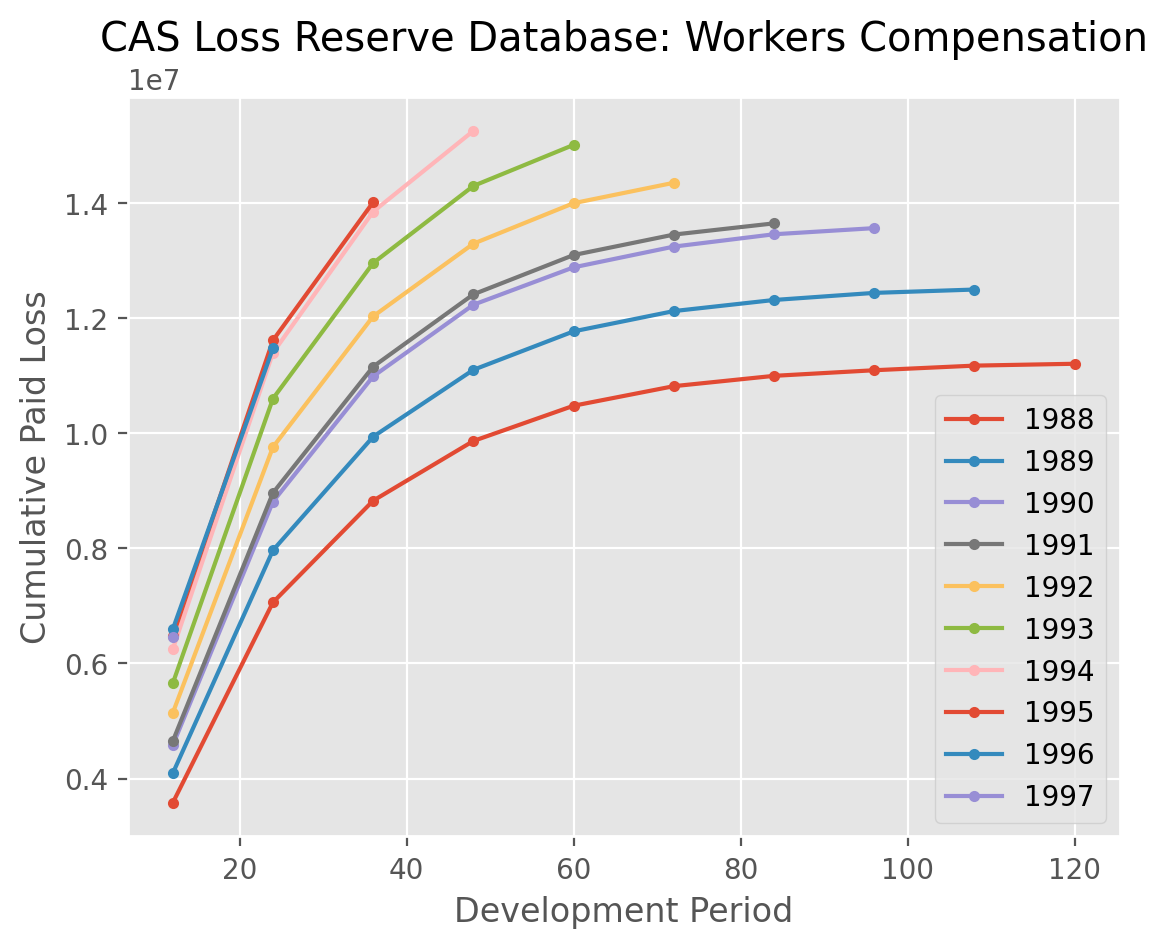

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Plot data
ax = triangle['CumPaidLoss'].sum().T.plot(
    marker='.', grid=True,
    title='CAS Loss Reserve Database: Workers Compensation',
    xlabel='Development Period', ylabel='Cumulative Paid Loss');